<a href="https://colab.research.google.com/github/zecenbajra55/1100python/blob/main/machine_learning_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# linear regression

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv("/content/Salary Data.csv")

In [ ]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
df.dtypes

Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary               373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [ ]:
df.isna()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
370,False,False,False,False,False,False
371,False,False,False,False,False,False
372,False,False,False,False,False,False
373,False,False,False,False,False,False


In [ ]:
df.isna().transpose()

,0,1,2,3,4,5,6,7,8,9,...,365,366,367,368,369,370,371,372,373,374
Age,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Gender,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Education Level,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Job Title,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Years of Experience,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
Salary,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

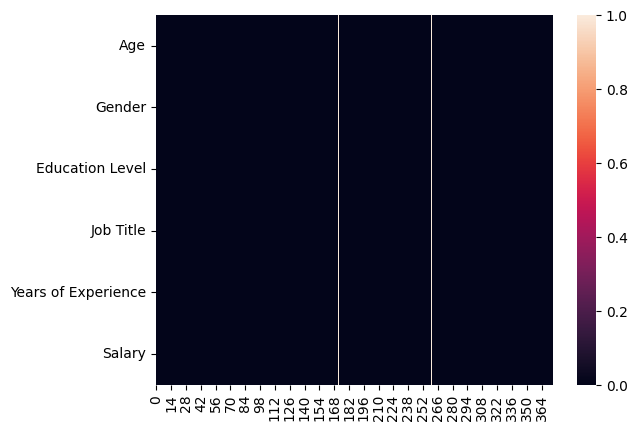

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(df.isna().transpose())

# missing data handling

* dropping
    * row: if the target or label or y is missing we drop the row. if entire row is missing we drop the row
    * column: if the column of data has more then 70% missing data we drop the column
* imputation : filling of missing values
    * mean : if data is normally distributed and has no outlier we use mean to filll in missng data
    * median : if the data is normally distributed and has outlier we use median to fill in missing data
    * mode : we sue mode to fill in missing data in categorical column

* algorithm:
    * MICE
    * IterativeImputer
    * KNN
    * Kmeans
    * LinearRegression

* mathematical
    * Interpolation
* EDA and reasoning


In [ ]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [ ]:
# drop rows with missing data
df.dropna(inplace = True)

In [ ]:
df.isna().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

# feature selection using correlation

<ipython-input-51-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

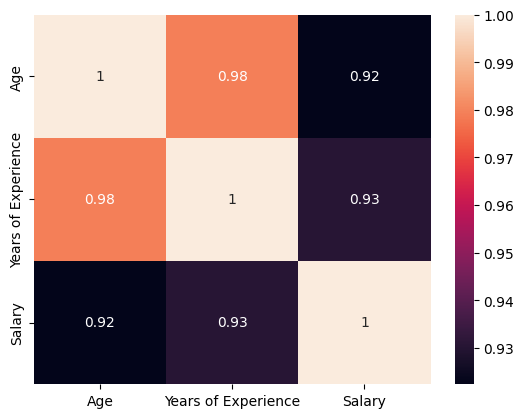

In [ ]:
sns.heatmap(df.corr(),annot=True)

* salary (label) has positive correlation with age and years of experience column with correlation value 0.92 and 0.93

* the independent variable "age" and "years of experience " also have 0.98 correlation value, the assumption of linear regression suggest that the independent variable should not be correlated . if they are correlated it is a problen of multi-colinarity. in such a case we should drop one column .

In our case we will drop age column because it has correlation value 0.92 with salary however years of experience has the correlation value 0.93.

In [ ]:
# selecting feature
x=df[['Years of Experience']]
y= df.Salary

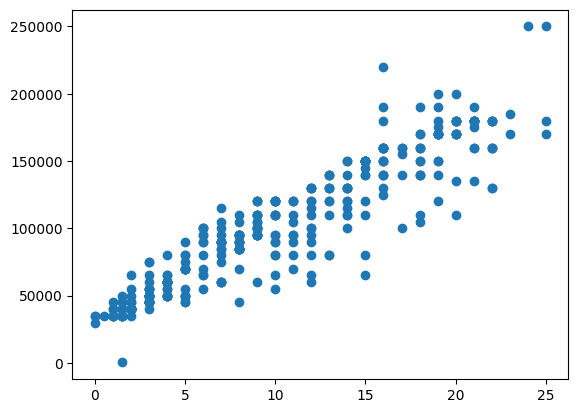

In [ ]:
plt.scatter(x=x,y=y)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size =0.2,random_state=40)

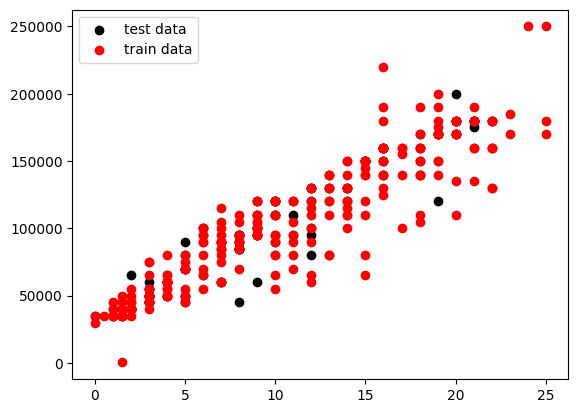

In [ ]:
plt.scatter(x=X_test,y=Y_test,label="test data",color='black')
plt.scatter(x=X_train,y=Y_train,label="train data",color='red')
plt.legend()

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mse=mean_squared_error(y_true=Y_test,y_pred=y_pred)
mae=mean_absolute_error(y_true=Y_test,y_pred=y_pred)
r2=r2_score(y_true=Y_test,y_pred=y_pred)

In [ ]:
mse

208984955.10552102

In [ ]:
mae

10762.154896945236

In [ ]:
r2

0.8984304678718172

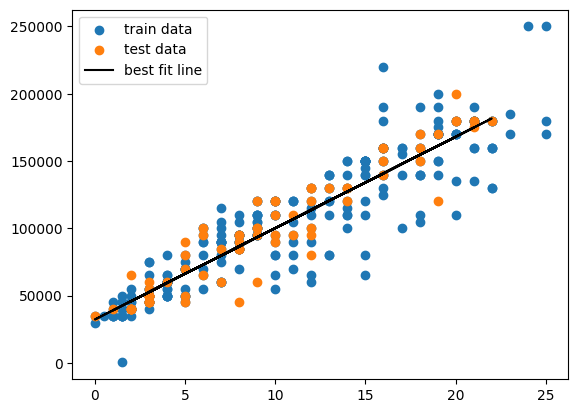

In [ ]:
plt.scatter(X_train,Y_train,label='train data')
plt.scatter(X_test,Y_test,label='test data')
plt.plot(X_test,y_pred, label='best fit line',color= 'black')
plt.legend()
plt.show()

In [ ]:
# suppose i have 5 years of experience what will be my salary
model.predict([[5]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([66239.34403001])

In [ ]:
model.predict([[15]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([134111.22921989])

In [ ]:
# education level might also affect the salary

<Axes: xlabel='Education Level', ylabel='Salary'>

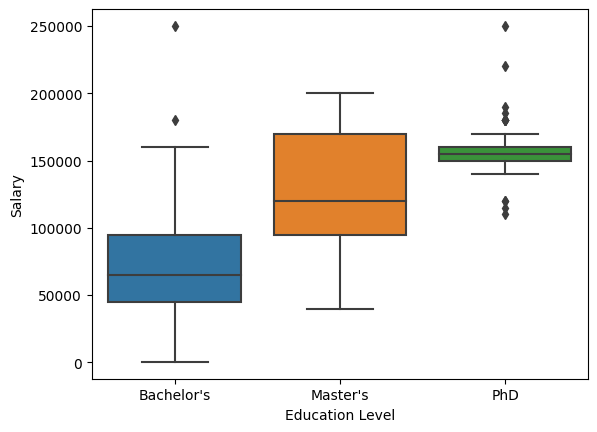

In [ ]:
sns.boxplot(x='Education Level', y="Salary",data=df)

In [ ]:
X = df[['Years of Experience','Education Level']]
y=df.Salary


In [ ]:
X.head()

,Years of Experience,Education Level
0,5.0,Bachelor's
1,3.0,Master's
2,15.0,PhD
3,7.0,Bachelor's
4,20.0,Master's


# encoding categorical data to numerical

In [ ]:
X_new= pd.get_dummies(data=X,columns=['Education Level'],drop_first=True)

In [ ]:
X_new

,Years of Experience,Education Level_Master's,Education Level_PhD
0,5.0,0,0
1,3.0,1,0
2,15.0,0,1
3,7.0,0,0
4,20.0,1,0
...,...,...,...
370,8.0,0,0
371,19.0,1,0
372,2.0,0,0
373,7.0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_new,y,test_size =0.2,random_state=40)

In [ ]:
from sklearn.linear_model import LinearRegression
model= LinearRegression()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mse=mean_squared_error(y_true=Y_test,y_pred=y_pred)
mae=mean_absolute_error(y_true=Y_test,y_pred=y_pred)
r2=r2_score(y_true=Y_test,y_pred=y_pred)

In [ ]:
mse


191401829.51383474

In [ ]:
mae

10554.378666328781

In [ ]:
r2

0.9069761061872496

In [ ]:
model.predict([[5,0,0]])  # 5 years of experience with bachelors

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([62731.45135465])

In [ ]:
model.predict([[5,0,1]])  # 5 years of experience with phd

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([87052.61125929])

linear models are likely to overfit
we use regularization technique to avoid overfitting in linear models.
some regularization technique are
* Lasso ( l1 regularization)
* Ridge (l2 regularization)
* ElasticNet : Lasso + Ridge

other overfitting avoiding technique
* cross validation
* early stopping (deep learning)
* drop out layer (deep learning)

In [ ]:
x=df[['Years of Experience','Education Level','Gender']]
y= df.Salary
X_new= pd.get_dummies(data=x,columns=['Education Level','Gender'],drop_first=True)
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X_new,y,test_size =0.2,random_state=40)
from sklearn.linear_model import Lasso
model= Lasso()
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mse=mean_squared_error(y_true=Y_test,y_pred=y_pred)
mae=mean_absolute_error(y_true=Y_test,y_pred=y_pred)
r2=r2_score(y_true=Y_test,y_pred=y_pred)
print(f"mse = {mse}")
print(f"mae = {mae}")
print(f"r2_score = {r2}")

mse = 183988408.1766693
mae = 10625.356337367348
r2_score = 0.9105791298417742


In [ ]:
X= df[['Years of Experience', 'Education Level' , 'Gender']]
y = df.Salary
X_new = pd.get_dummies(data = X, columns = ['Education Level', 'Gender'], drop_first = True)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new,
 y,
 test_size = 0.2,
 random_state = 40)
from sklearn.linear_model import Ridge
model = Ridge()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
mae = mean_absolute_error(y_true=y_test, y_pred=y_pred)
r2_score = r2_score(y_true=y_test, y_pred=y_pred)
print(f"mse = {mse}")
print(f"mae = {mae}")
print(f"r2_score = {r2_score}")

mse = 182360519.28086293
mae = 10573.945473529131
r2_score = 0.9113703059980686
